In [56]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [58]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
df = df.drop(columns=['Id'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
tempPat = []
tempClass = ''
pattern = []
classes = []

rng = df['SepalLengthCm'].size
print(rng)
for i in range(rng):
    tempPat = [df.loc[i]['SepalLengthCm'], df.loc[i]['SepalWidthCm'], df.loc[i]['PetalLengthCm'], df.loc[i]['PetalWidthCm']]
    print(tempPat)
    tempClass = df.loc[i]['Species']
    print(tempClass)
    pattern.append(tempPat)
    classes.append(tempClass)


150
[5.1, 3.5, 1.4, 0.2]
Iris-setosa
[4.9, 3.0, 1.4, 0.2]
Iris-setosa
[4.7, 3.2, 1.3, 0.2]
Iris-setosa
[4.6, 3.1, 1.5, 0.2]
Iris-setosa
[5.0, 3.6, 1.4, 0.2]
Iris-setosa
[5.4, 3.9, 1.7, 0.4]
Iris-setosa
[4.6, 3.4, 1.4, 0.3]
Iris-setosa
[5.0, 3.4, 1.5, 0.2]
Iris-setosa
[4.4, 2.9, 1.4, 0.2]
Iris-setosa
[4.9, 3.1, 1.5, 0.1]
Iris-setosa
[5.4, 3.7, 1.5, 0.2]
Iris-setosa
[4.8, 3.4, 1.6, 0.2]
Iris-setosa
[4.8, 3.0, 1.4, 0.1]
Iris-setosa
[4.3, 3.0, 1.1, 0.1]
Iris-setosa
[5.8, 4.0, 1.2, 0.2]
Iris-setosa
[5.7, 4.4, 1.5, 0.4]
Iris-setosa
[5.4, 3.9, 1.3, 0.4]
Iris-setosa
[5.1, 3.5, 1.4, 0.3]
Iris-setosa
[5.7, 3.8, 1.7, 0.3]
Iris-setosa
[5.1, 3.8, 1.5, 0.3]
Iris-setosa
[5.4, 3.4, 1.7, 0.2]
Iris-setosa
[5.1, 3.7, 1.5, 0.4]
Iris-setosa
[4.6, 3.6, 1.0, 0.2]
Iris-setosa
[5.1, 3.3, 1.7, 0.5]
Iris-setosa
[4.8, 3.4, 1.9, 0.2]
Iris-setosa
[5.0, 3.0, 1.6, 0.2]
Iris-setosa
[5.0, 3.4, 1.6, 0.4]
Iris-setosa
[5.2, 3.5, 1.5, 0.2]
Iris-setosa
[5.2, 3.4, 1.4, 0.2]
Iris-setosa
[4.7, 3.2, 1.6, 0.2]
Iris-setosa
[4.8, 

In [60]:
def euclidDist(map,x):
    x = x.reshape((1,1,-1))
    euMap = map - x
    euMap = euMap**2
    euMap = np.sqrt(np.sum(euMap,2))
    return euMap

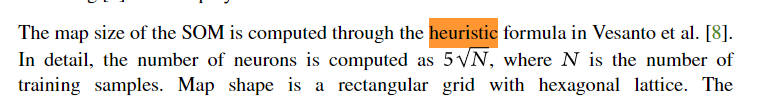

In [61]:
def mu(inpSize,size='small'):
    hmu = 5*inpSize**0.54321
    if size == 'big':
        hmu = 4*(hmu)
    else:
        hmu = 0.25*(hmu)   
    return hmu
               
mus = mu(len(pattern),size='big')
print(mus)

304.1617011472737


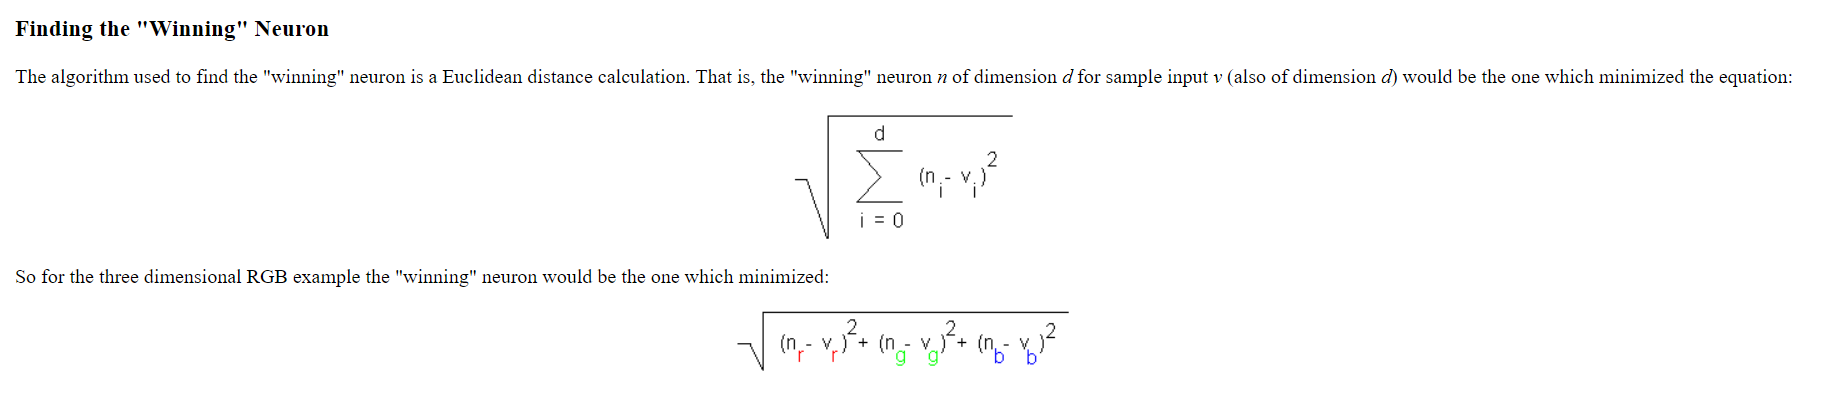

In [80]:
input_dimensions = 4
map_width = 9
map_height = 5
MAP = np.random.uniform(size=(map_height,map_width,input_dimensions))
prev_MAP = np.zeros((map_height,map_width,input_dimensions))

radius0 = max(map_width,map_height)/2
learning_rate0 = 0.1

coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32)

for i in range(0,map_height):
    for j in range(0,map_width):
        coordinate_map[i][j] = [i,j]
epochs = 500
radius=radius0
learning_rate = learning_rate0
max_iterations = len(pattern)+1
too_many_iterations = 10*max_iterations

convergence = [1]

timestep=1
convergedAlready=False

epoch=0
while epoch<epochs:
    
    shuffle = np.random.randint(len(pattern), size=len(pattern))
    for i in range(len(pattern)):
        J = np.linalg.norm(MAP - prev_MAP)
        if  J <= 0.001 :
            convergedAlready=True
            break
        else:
            patter = pattern[shuffle[i]]
            pattern_ary = np.tile(patter, (map_height, map_width, 1))
            # print(str(map_height) + ' ' + str(map_width))
            # print(len(pattern_ary))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)
            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
      
            prev_MAP = np.copy(MAP)
             
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        MAP[i][j] = MAP[i][j] + learning_rate*(patter-MAP[i][j])
            
            learning_rate = learning_rate0*(1-(epoch/epochs))
            radius = radius0*math.exp(-epoch/epochs)            
            timestep+=1
    print('LowestError: %s' %str(J) + ', Epoch#: %s' % str(epoch) + ', LR: %s' % str(learning_rate) + ', Radius: %s' % str(radius))
    if J < min(convergence):
      MAP_final = MAP

    convergence.append(J)
    
    if convergedAlready== True :
        break
    epoch+=1

LowestError: 1.4737211743414853, Epoch#: 0, LR: 0.1, Radius: 4.5
LowestError: 1.0681926626739224, Epoch#: 1, LR: 0.0998, Radius: 4.491008994002999
LowestError: 0.8239436064193808, Epoch#: 2, LR: 0.09960000000000001, Radius: 4.482035952047962
LowestError: 0.8905356463884246, Epoch#: 3, LR: 0.0994, Radius: 4.4730808382427085
LowestError: 0.3591837940779583, Epoch#: 4, LR: 0.09920000000000001, Radius: 4.464143616766773
LowestError: 1.033516127610179, Epoch#: 5, LR: 0.099, Radius: 4.455224251871257
LowestError: 0.7402256199306109, Epoch#: 6, LR: 0.0988, Radius: 4.4463227078786876
LowestError: 0.8072888971752189, Epoch#: 7, LR: 0.09860000000000001, Radius: 4.437438949182878
LowestError: 0.8231316719150628, Epoch#: 8, LR: 0.0984, Radius: 4.428572940248783
LowestError: 0.8097236650634981, Epoch#: 9, LR: 0.09820000000000001, Radius: 4.419724645612353
LowestError: 0.7359231681672674, Epoch#: 10, LR: 0.098, Radius: 4.4108940298803985
LowestError: 1.0240553047887502, Epoch#: 11, LR: 0.0978, Radiu

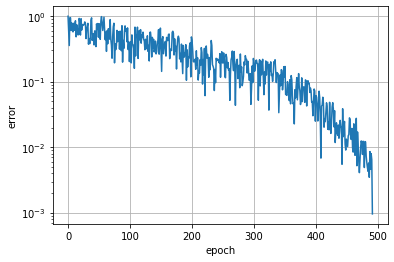

Number of timesteps: 73519
Final error: 0.0009601181848368643


In [70]:
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))

Red = Iris-Setosa
Blue = Iris-Virginica
Green = Iris-Versicolor


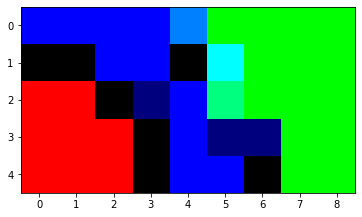

In [71]:
from PIL import Image
i = 0
result_map = np.zeros([map_height,map_width,3],dtype=np.float32)
for patter in pattern:
    pattern_ary = np.tile(patter, (map_height, map_width, 1))
    Eucli_MAP = np.linalg.norm(patter - MAP_final, axis=2)
    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    x = BMU[0]
    y = BMU[1]
    if classes[i] == 'Iris-setosa':
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classes[i] == 'Iris-virginica':
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classes[i] == 'Iris-versicolor':
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i = i + 1
result_map = np.flip(result_map,0)
    
#print result_map

print("Red = Iris-Setosa")
print("Blue = Iris-Virginica")
print("Green = Iris-Versicolor")

plt.imshow(result_map, interpolation='nearest')